In [23]:
#prerequisites
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df= pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
#divide the dataset 
x=df.iloc[:,3:13]
y=df.iloc[:,13]

#endcoding 
from sklearn.preprocessing import LabelEncoder


labelEncoder = LabelEncoder()
x["Gender"] = labelEncoder.fit_transform(x["Gender"])
#one-hot
x = pd.get_dummies(x,columns=["Geography"],drop_first=True)


In [25]:
#split the data and then notrmalise it 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [33]:

#build the neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(units=6, activation="relu", input_dim=x_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=6, activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"] )


In [34]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7523 - loss: 0.5843 - val_accuracy: 0.8035 - val_loss: 0.4959
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7945 - loss: 0.4996 - val_accuracy: 0.8035 - val_loss: 0.4570
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7945 - loss: 0.4743 - val_accuracy: 0.8035 - val_loss: 0.4386
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7945 - loss: 0.4635 - val_accuracy: 0.8035 - val_loss: 0.4265
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7975 - loss: 0.4526 - val_accuracy: 0.8090 - val_loss: 0.4140
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8039 - loss: 0.4412 - val_accuracy: 0.8160 - val_loss: 0.4034
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8077 - loss: 0.4369 - val_accuracy: 0.8210 - val_loss: 0.3942
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8127 - loss: 0.4253 - val_accuracy: 0.

Accuracy per Epoch : 

Epoch 1 -> Training Accuracy : 75.23% , Validation Accuracy : 80.35%
Epoch 2 -> Training Accuracy : 79.45% , Validation Accuracy : 80.35%
Epoch 3 -> Training Accuracy : 79.45% , Validation Accuracy : 80.35%
Epoch 4 -> Training Accuracy : 79.45% , Validation Accuracy : 80.35%
Epoch 5 -> Training Accuracy : 79.75% , Validation Accuracy : 80.90%
Epoch 6 -> Training Accuracy : 80.39% , Validation Accuracy : 81.60%
Epoch 7 -> Training Accuracy : 80.77% , Validation Accuracy : 82.10%
Epoch 8 -> Training Accuracy : 81.27% , Validation Accuracy : 82.00%
Epoch 9 -> Training Accuracy : 81.67% , Validation Accuracy : 82.60%
Epoch 10 -> Training Accuracy : 82.19% , Validation Accuracy : 83.20%
Epoch 11 -> Training Accuracy : 82.41% , Validation Accuracy : 83.30%
Epoch 12 -> Training Accuracy : 82.41% , Validation Accuracy : 83.40%
Epoch 13 -> Training Accuracy : 82.95% , Validation Accuracy : 83.75%
Epoch 14 -> Training Accuracy : 82.88% , Validation Accuracy : 84.45%
Epoch 

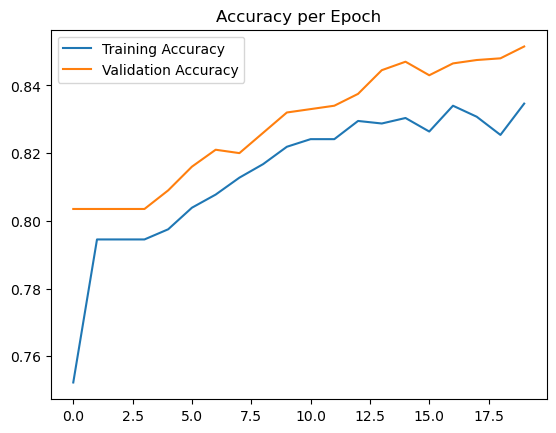

In [38]:
print("Accuracy per Epoch : \n")
train_acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
for i in range(len(train_acc)):
    print(f"Epoch {i+1} -> Training Accuracy : {train_acc[i]*100:.2f}% , Validation Accuracy : {val_acc[i]*100:.2f}%")
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel="Epoch"
plt.ylabel="Accuracy"
plt.legend()
plt.show()

In [41]:
y_pred=model.predict(x_test)
y_pred = (y_pred > 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [42]:
#evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred))

Accuracy Score :  0.8515
Confusion Matrix : 
[[1573   34]
 [ 263  130]]
